In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries

from datetime import datetime, date
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

In [2]:
# Load the electric dataset(CSV) into a Pandas DataFrame
df_el = pd.read_csv('Day-ahead Prices.csv')
# Select the desired columns
df_el = df_el[['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]']]

# Rename the columns
df_el = df_el.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'price'})

# Extract the first 16 characters from the 'date' column
df_el['date'] = df_el['date'].apply(lambda x: x[0:16])

# Drop rows where 'price' column is equal to '-'
df_el.drop(df_el[df_el['price'] == '-'].index, inplace=True)

median_price = df_el['price'].median()
df_el['price'].fillna(median_price, inplace=True) 

df_el['date'] = pd.to_datetime(df_el['date'], format='%d.%m.%Y %H:%M')
ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=False, freq='H')

In [3]:
# create day and time covariate series_basic one (I think our data is important day and hour relationship.)

hour_series = datetime_attribute_timeseries(
    pd.date_range(start=ts.start_time(), freq=ts.freq_str, periods=len(ts)),
    attribute="hour",
    one_hot=False)
day_series = datetime_attribute_timeseries(
    pd.date_range(start=ts.start_time(), freq=ts.freq_str, periods=len(ts)),
    attribute="day",
    one_hot=False)
month_series = datetime_attribute_timeseries(
    pd.date_range(start=ts.start_time(), freq=ts.freq_str, periods=len(ts)),
    attribute="month",
    one_hot=False)
year_series = datetime_attribute_timeseries(
    pd.date_range(start=ts.start_time(), freq=ts.freq_str, periods=len(ts)),
    attribute="year",
    one_hot=False)
weekday_series = datetime_attribute_timeseries(
    pd.date_range(start=ts.start_time(), freq=ts.freq_str, periods=len(ts)),
    attribute="dayofweek",
    one_hot=False)
weekofyear_series = datetime_attribute_timeseries(
    pd.date_range(start=ts.start_time(), freq=ts.freq_str, periods=len(ts)),
    attribute="weekofyear",
    one_hot=False)

In [4]:
# series_transform
hour_trasform = Scaler().fit_transform(hour_series)
day_transform = Scaler().fit_transform(day_series)
month_transform = Scaler().fit_transform(month_series)
year_transform = Scaler().fit_transform(year_series)
weekday_transform = Scaler().fit_transform(weekday_series)
weekofyear_transform = Scaler().fit_transform(weekofyear_series)

In [5]:
# we can use two cov, because our data is seasonality data based on time.
cov_day_hour = day_transform.stack(hour_series)
cov_all = hour_trasform.stack(day_transform).stack(month_transform).stack(year_transform).stack(weekday_transform).stack(weekofyear_transform)

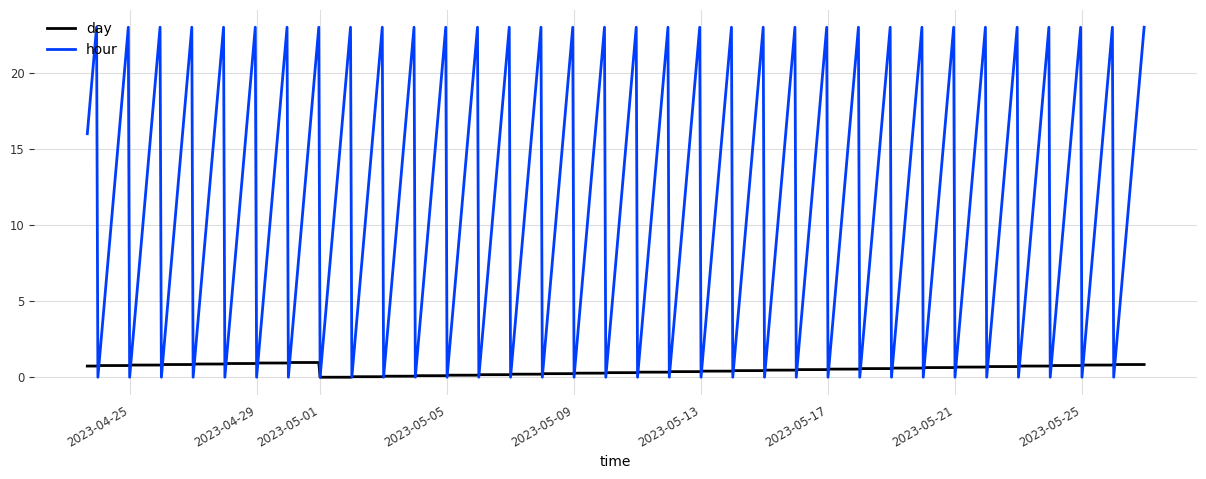

In [8]:
plt.figure(figsize=(15,5))
cov_day_hour[-800:].plot()

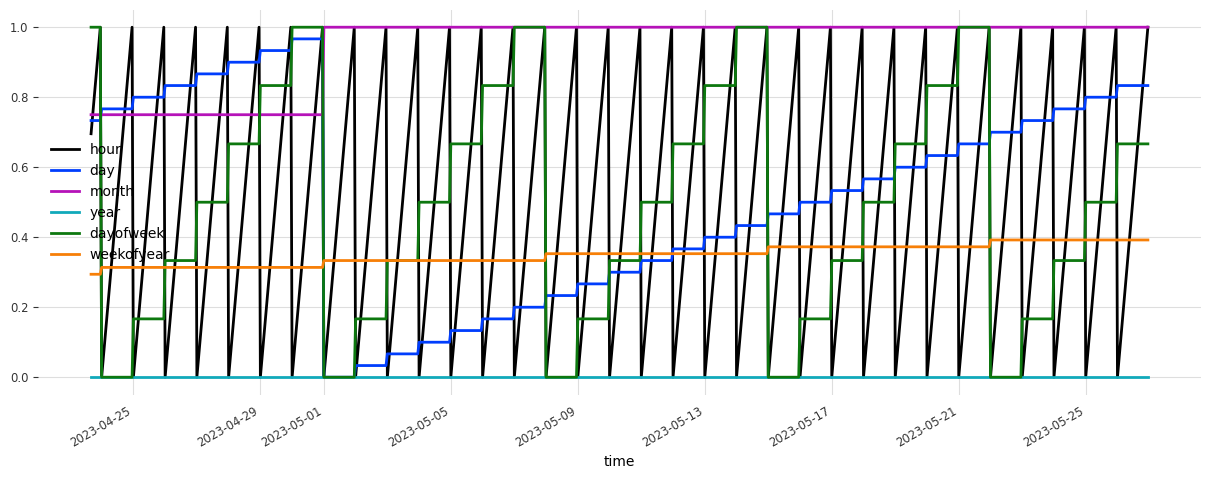

In [9]:
plt.figure(figsize=(15,5))
cov_all[-800:].plot()